In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [183]:
df = pd.read_csv('Students Social Media Addiction.csv')
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3,8.0
1,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3,8.0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5.0,Complicated,4,9.0
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6.0,In Relationship,2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7.0,In Relationship,2,5.0
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4.0,Single,5,9.0
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6.0,In Relationship,3,7.0
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8.0,Single,2,4.0


## Cek Missing Value

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                703 non-null    object 
 4   Country                       703 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            703 non-null    object 
 7   Affects_Academic_Performance  698 non-null    object 
 8   Sleep_Hours_Per_Night         703 non-null    float64
 9   Mental_Health_Score           701 non-null    float64
 10  Relationship_Status           696 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                690 non-null    float64
dtypes: fl

In [185]:
df.isna().sum()

Student_ID                       0
Age                              0
Gender                           0
Academic_Level                   2
Country                          2
Avg_Daily_Usage_Hours            0
Most_Used_Platform               2
Affects_Academic_Performance     7
Sleep_Hours_Per_Night            2
Mental_Health_Score              4
Relationship_Status              9
Conflicts_Over_Social_Media      0
Addicted_Score                  15
dtype: int64

bisa dilihat dari 13 kolom di atas, kolom `Academic_Level`, `Country`, `Most_Used_Platform`, `Affects_Academic_Performance`, `Sleep_Hours_per_Night`, `Mental_Health_Score`, `Relationship_Status`, dan `Addicted_Score` memiliki nilai yang kosong

## Mengatasi Missing Values

In [186]:
# mengatasi missing values
df_social_media = df.copy()
for column in df_social_media.columns:
    if df_social_media[column].dtype == 'object':
        # jika kolom bertipe objek, isi dengan modus
        df_social_media[column].fillna(df_social_media[column].mode()[0], inplace=True)
    else:
        # jika kolom bertipe numerik, isi dengan rata-rata
        df_social_media[column].fillna(df_social_media[column].mean(), inplace=True)

In [187]:
df_social_media.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [188]:
df_social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    float64
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    float64
dtypes: fl

karena jumlah missing value nya tidak sampe 10% dari total dataset, maka dilakukan drop untuk nilai yang kosong tersebut.

## Cek Data Duplikat

In [189]:
# cek duplikat
duplikat = df_social_media.duplicated().sum()
duplikat
# print(f"Jumlah data duplikat: {duplikat}")

8

In [190]:
# mengatasi duplikat
duplikat = df_social_media.copy()
duplikat = duplikat.drop_duplicates() #drop data duplikat
duplikat

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3,8.0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5.0,Complicated,4,9.0
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6.0,In Relationship,2,7.0
5,6,18,Male,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7.0,In Relationship,2,5.0
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4.0,Single,5,9.0
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6.0,In Relationship,3,7.0
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8.0,Single,2,4.0


In [191]:
handle_duplicate = duplikat.duplicated().sum()
print(f"Jumlah data duplikat : {handle_duplicate}")

Jumlah data duplikat : 0


In [192]:
duplikat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    697 non-null    int64  
 1   Age                           697 non-null    int64  
 2   Gender                        697 non-null    object 
 3   Academic_Level                697 non-null    object 
 4   Country                       697 non-null    object 
 5   Avg_Daily_Usage_Hours         697 non-null    float64
 6   Most_Used_Platform            697 non-null    object 
 7   Affects_Academic_Performance  697 non-null    object 
 8   Sleep_Hours_Per_Night         697 non-null    float64
 9   Mental_Health_Score           697 non-null    float64
 10  Relationship_Status           697 non-null    object 
 11  Conflicts_Over_Social_Media   697 non-null    int64  
 12  Addicted_Score                697 non-null    float64
dtypes: float64

In [193]:
duplikat.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,356.763271,20.652798,4.927690,6.869758,6.222208,2.853659,6.460576
std,201.746540,1.388570,1.241509,1.121374,1.090567,0.941594,1.539439
min,1.000000,18.000000,2.200000,3.800000,4.000000,0.000000,3.000000
25%,183.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,357.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,531.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,8.000000,5.000000,9.000000


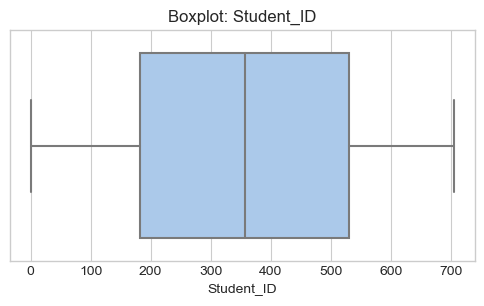

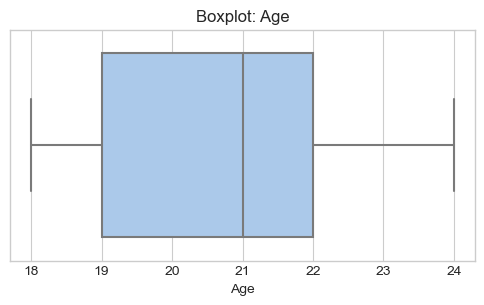

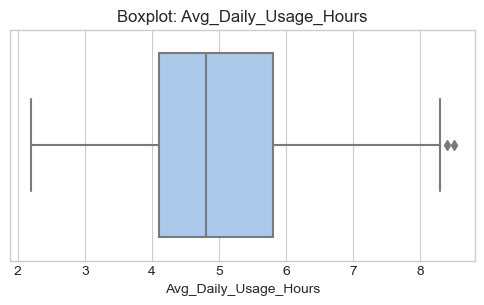

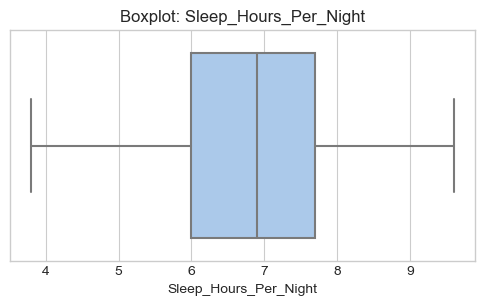

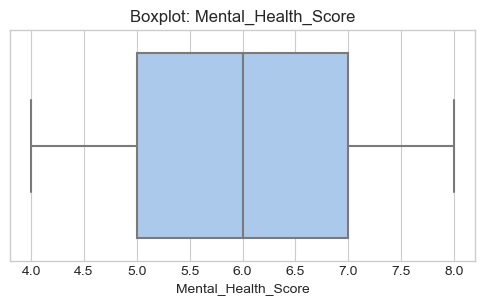

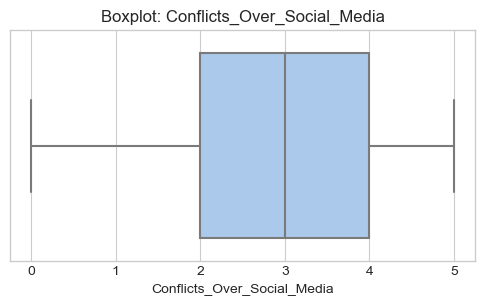

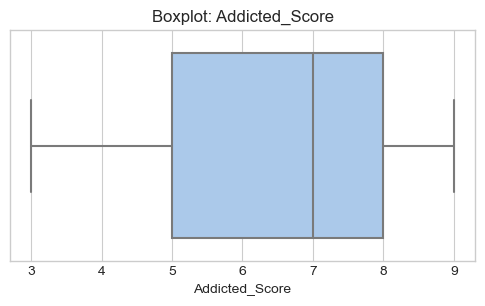

In [194]:
# Kolom numerik
numerical_cols = duplikat.select_dtypes(include=['float64', 'int64']).columns

# Tampilkan boxplot untuk tiap kolom
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=duplikat[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


## Exploratory Data Analysis

### Mengubah type kategorikal ke numerik

#### 1. Kolom `Gender`

In [195]:
data = duplikat.copy()

In [196]:
print(data['Gender'].unique())
print(data['Academic_Level'].unique())
print(data['Most_Used_Platform'].unique())
print(data['Relationship_Status'].unique())

['Female' 'Male']
['Undergraduate' 'High School' 'Graduate']
['Instagram' 'TikTok' 'YouTube' 'Facebook' 'LinkedIn' 'Snapchat' 'LINE'
 'KakaoTalk' 'VKontakte' 'WhatsApp' 'WeChat' 'Twitter']
['In Relationship' 'Complicated' 'Single']


Mengubah kategorikal gender : 

0 = Female

1 = Male

In [197]:
le = LabelEncoder()
data_gender = data.copy()
data_gender['Gender'] = le.fit_transform(data_gender['Gender'])  # Female=0, Male=1 (otomatis)
data_gender


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,0,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3,8.0
2,3,20,0,Undergraduate,USA,6.0,TikTok,Yes,5.0,5.0,Complicated,4,9.0
3,4,18,1,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
4,5,21,1,Graduate,Canada,4.5,Facebook,Yes,6.0,6.0,In Relationship,2,7.0
5,6,18,1,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,0,Undergraduate,Italy,4.7,TikTok,No,7.2,7.0,In Relationship,2,5.0
701,702,23,1,Graduate,Russia,6.8,Instagram,Yes,5.9,4.0,Single,5,9.0
702,703,21,0,Undergraduate,China,5.6,WeChat,Yes,6.7,6.0,In Relationship,3,7.0
703,704,24,1,Graduate,Japan,4.3,Twitter,No,7.5,8.0,Single,2,4.0


#### 2. Kolom `Academic_Level`

- 11 = High School
- 12 = Undergraduate
- 13 = Graduate

In [198]:
data_academic = data_gender.copy()
level_order = {'High School' : 11, 'Undergraduate' : 12, 'Graduate' : 13}
data_academic['Academic_Level'] = data_academic['Academic_Level'].map(level_order)
data_academic

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,0,12,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3,8.0
2,3,20,0,12,USA,6.0,TikTok,Yes,5.0,5.0,Complicated,4,9.0
3,4,18,1,11,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
4,5,21,1,13,Canada,4.5,Facebook,Yes,6.0,6.0,In Relationship,2,7.0
5,6,18,1,11,UK,3.0,YouTube,No,7.0,7.0,Single,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,0,12,Italy,4.7,TikTok,No,7.2,7.0,In Relationship,2,5.0
701,702,23,1,13,Russia,6.8,Instagram,Yes,5.9,4.0,Single,5,9.0
702,703,21,0,12,China,5.6,WeChat,Yes,6.7,6.0,In Relationship,3,7.0
703,704,24,1,13,Japan,4.3,Twitter,No,7.5,8.0,Single,2,4.0
